# Task description

In this document, we create a predictive model to predict House Price based on the data in the past. Will be used linear regression, it's modifications (lasso and ridge) with different combinations of features (categorical and numerical)

To train the model, we have the dataset - 'data.csv'

# 1. Install required libraries 

In [82]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

# 2. Read and preprocess the data

In [4]:
data = pd.read_csv('data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.columns.shape # the number of columns (features) in the dataset

(81,)

As we see, we have 81 features. Some of then are categorical and some of them are numeric.

Try to define numeric features where we have NaN values and define % of NaN from all feature values. It helps us to define what features should be dropped (because of big % NaN value).

In [12]:
nans = pd.concat([data.isnull().sum(), (data.isnull().sum() / data.shape[0])*100], axis=1, keys=['Train', 'Percentage'])
print(nans[nans.sum(axis=1) > 0])

              Train  Percentage
LotFrontage     259   17.739726
Alley          1369   93.767123
MasVnrType        8    0.547945
MasVnrArea        8    0.547945
BsmtQual         37    2.534247
BsmtCond         37    2.534247
BsmtExposure     38    2.602740
BsmtFinType1     37    2.534247
BsmtFinType2     38    2.602740
Electrical        1    0.068493
FireplaceQu     690   47.260274
GarageType       81    5.547945
GarageYrBlt      81    5.547945
GarageFinish     81    5.547945
GarageQual       81    5.547945
GarageCond       81    5.547945
PoolQC         1453   99.520548
Fence          1179   80.753425
MiscFeature    1406   96.301370


There are 6 features with NaN values of more than 15%. Drop these features. Also, drop 'Id', because it does not has any value.

In [13]:
data.drop(['Id', 'LotFrontage','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
data.shape

(1460, 74)

We also see that for some objects exist NaN values. We drop those values too.

In [16]:
data.dropna(inplace = True)

In [17]:
data.shape

(1338, 74)

We dropped 122 objects which is 8.3 from the whole DataSet.

Some of the features are categorical. Separate Categorical features and numeric. Also, we create new DataSet which has only numeric features to train our first model. In the next models, categorical features will be used too.  

In [24]:
# Create the list of categorical features 
# Define not numerical fearures
cat_features = []
for i in data.columns:
    if (data[i].dtypes == object):
        cat_features.append(i)
len(cat_features)

38

38 features are categorical and 36 is numeric. 

Create 2 new DataSets. One of them, consist only from numeric and one of them - only from categorical features.

In [29]:
# Numerical features DataSet
data_num = data.drop(cat_features, axis=1)
# Categorical features DataSet
data_cat = data[cat_features]
data_num.shape, data_cat.shape

((1338, 36), (1338, 38))

# 3. Train the first model

### 3.1. Define the metric

It's better to use MAPE (mean absolute percentage error)

In [31]:
# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

We will train the model for lots of times. So, we need to create the function to train the model. 
We use:
- linear regression
- lasso (add penalty equivalent to the magnitude of the coefficients. Feature selection)
- ridge (add penalty equivalent to square of the magnitude of the coefficients)

In [58]:
def train(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    # Linear 
    linear = LinearRegression()
    model = linear.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Linear regression MAPE: %.3f' % mean_absolute_percentage_error(y_test, y_pred))
    # Lasso
    clf = linear_model.Lasso()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mean_absolute_percentage_error(y_test, y_pred)
    print('Lasso MAPE: %.3f' % mean_absolute_percentage_error(y_test, y_pred))
    # Ridge
    rid = Ridge()
    rid.fit(X_train, y_train) 
    y_pred = rid.predict(X_test)
    mean_absolute_percentage_error(y_test, y_pred)
    print('Ridge MAPE: %.3f' % mean_absolute_percentage_error(y_test, y_pred))

### 3.2. Train first model based only on numeric features

In [59]:
# Define target and drop it from the X features 
y = data_num['SalePrice']
X = data_num.drop('SalePrice', axis=1)
# Fill the model function
train(X, y)

Linear regression MAPE: 12.256
Lasso MAPE: 12.255
Ridge MAPE: 12.249


So, MAPE is near 12.256% without categorical features for Linear regression and Lasso. For Ridge, it's better a bit - 12.249%.

### 3.3. Train the second model, excluding correlation

We know that the correlation between features can affect a lot on the result.
In this model, we exclude highly correlated features to SalePrice and estimate the model.

Draw the correlation matrix.

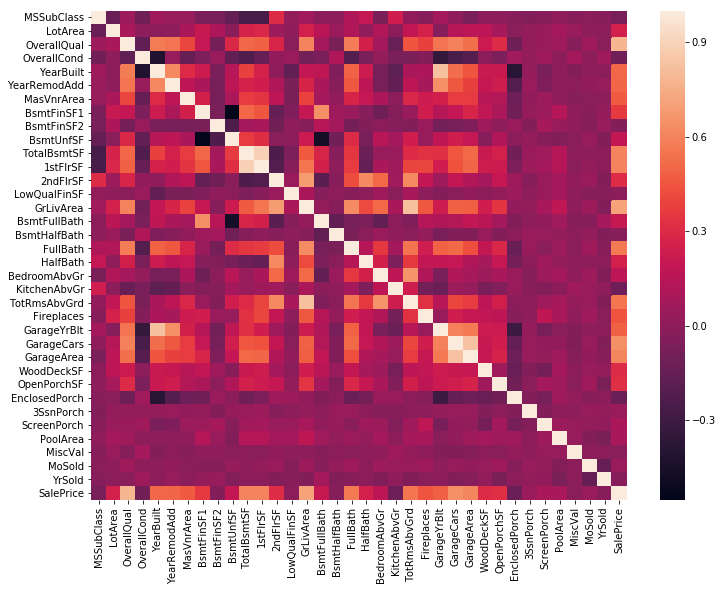

In [61]:
# General correlation matrix
corrmat = data_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

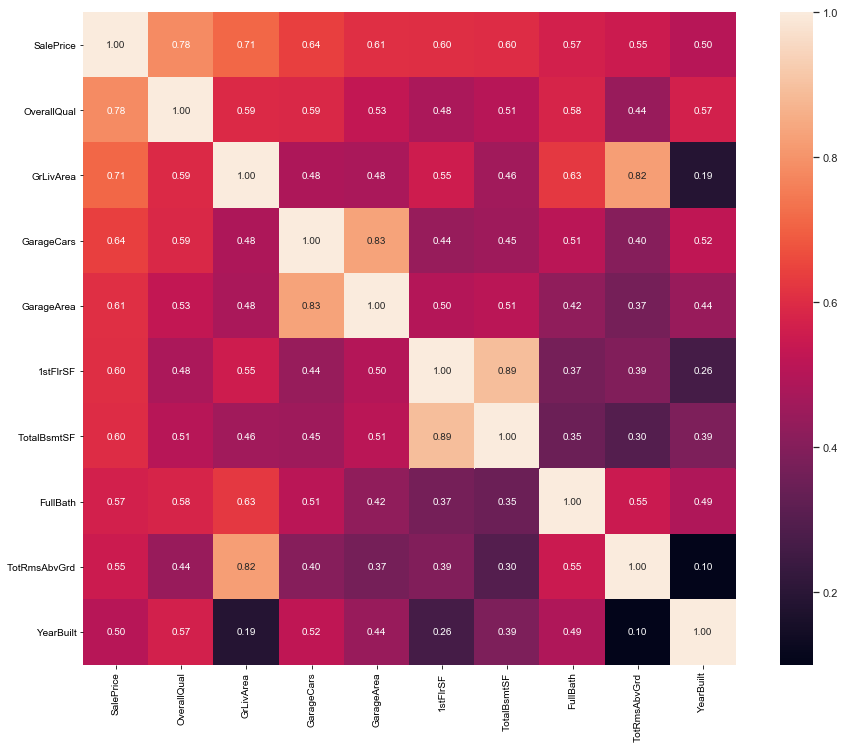

In [62]:
# Correlation matrix for target
f, ax = plt.subplots(figsize=(16, 12))
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_num[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Results interpretation:
1. SalesPrice (target) had a strong correlation with OverallQual (0.78) and GrLivArea (0.71)
2. GrLivArea has strong correlation with TotRmsAvbGrd (0.82)
3. GarageCars has a strong correlation with GarrageArea 
4. 1stFirSF has a strong correlation with TotalBsmtSF

In [64]:
# Create the array of features should be excluded according to the correlation
corr_features = ['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', '1stFlrSF']
# Exclude those features from the dataset
data_num_excorr = data_num.drop(corr_features, axis=1)
data_num_excorr.shape

(1338, 31)

5 features are excluded and now train our model.

In [67]:
# Define target and drop it from the X features 
y = data_num_excorr['SalePrice']
X = data_num_excorr.drop('SalePrice', axis=1)
# Fill the model function
train(X, y)

Linear regression MAPE: 13.428
Lasso MAPE: 13.428
Ridge MAPE: 13.421


We see that the first model with correlation gives better results. So, It's better to use the first model (with the correlation features).

### 3.3. Train the third model (add categorical features)

Categorical features are a string. So, using one-hot-encoding, we from N categorical features with k values, we create N*k features, where values will be "0" of "1". In this case, we won't lose important information.

In [69]:
onehotencoder = OneHotEncoder()
data_cat_hot = onehotencoder.fit_transform(data_cat).toarray()
data_cat_hot = pd.DataFrame(data_cat_hot)
data_cat_hot.shape

(1338, 229)

In [74]:
# Merge categorical features and numeric ones
data_cat_num = pd.merge(data_num, data_cat_hot, on=data_num.index, how='outer') 
data_cat_num.shape

(1338, 266)

In [75]:
data_cat_num.head()

,key_0,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,219,220,221,222,223,224,225,226,227,228
0,0,60,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,20,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,60,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,70,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,60,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
# Drop key_0
data_cat_num.drop('key_0', axis=1, inplace=True)

Now, we can train the model

In [83]:
y = data_cat_num['SalePrice']
X = data_cat_num.drop('SalePrice', axis=1)
# Fill the model function
train(X, y)

Linear regression MAPE: 10.990
Lasso MAPE: 10.979
Ridge MAPE: 11.310


We see an interesting result: Lasso gave, for now, the best result: 10.97%

# Conclusion

We got 11% of MAPE for the test DataSet. Those are not bad. 
Meaning that having the model, we can give predictions with an error in 11%. 